# Environment with Obstacles

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

from sgptools.utils.gpflow import get_model_params
from sgptools.utils.data import remove_polygons, remove_circle_patches
from sgptools.models.continuous_sgp import *

np.random.seed(0)
tf.random.set_seed(0)

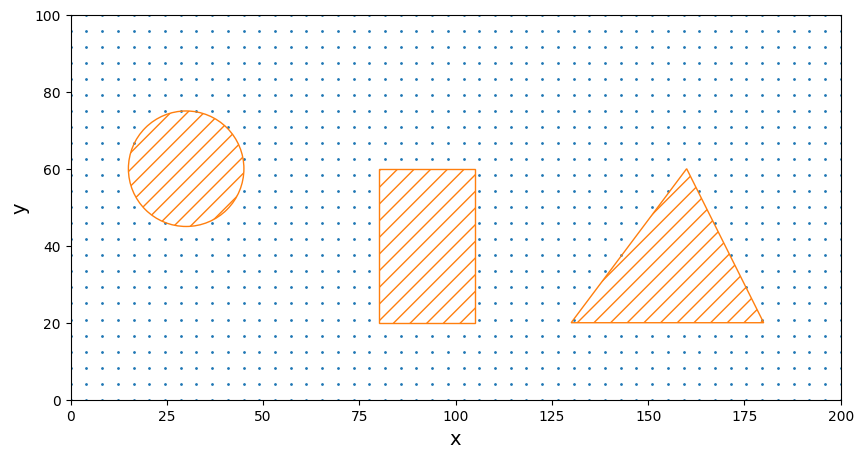

(1089, 2) (1089, 1)


In [2]:
# Generate synthetic training data
data_dims = (50, 25)
x = np.linspace(0, 200, data_dims[0])
y = np.linspace(0, 100, data_dims[1])
X, Y = np.meshgrid(x, y)

X, Y = remove_circle_patches(X, Y, [plt.Circle((30, 60), 15)])
X, Y = remove_polygons(X, Y, [[[80, 20], [105, 20], [105, 60], [80, 60]],])
X, Y = remove_polygons(X, Y, [[[130, 20], [180, 20], [160, 60]],])

plt.figure(figsize=(10, 5))
plt.scatter(X, Y, s=1)

ax = plt.gca()
ax.add_patch(plt.Polygon([[80, 20], [105, 20], [105, 60], [80, 60]], 
             fill=None, hatch='//', color='C1', label='Obstacle'))
ax.add_patch(plt.Polygon([[130, 20], [180, 20], [160, 60]], 
             fill=None, hatch='//', color='C1'))
ax.add_patch(plt.Circle((30, 60), 15, 
             fill=None, hatch='//', color='C1'))
ax.set_aspect('equal')

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(0, 200)
plt.ylim(0, 100)

plt.show()

X_train = np.array([X, Y]).T
y_train = np.zeros((X_train.shape[0], 1))
X_train = X_train.astype(float)
y_train = y_train.astype(float)
print(X_train.shape, y_train.shape)

In [3]:
num_inducing = 200

# Get initial GP parameters
_, noise_variance, rbf = get_model_params(np.zeros((1, 2)), np.zeros((1, 1)), 
                             lengthscales=12.3254, 
                             variance=0.561265,
                             noise_variance=2e-6,
                             max_steps=0)

# Optimize the inducing points/sensor locations
sgpr, _ = continuous_sgp(num_inducing,
                         X_train,
                         kernel=rbf,
                         noise_variance=noise_variance,
                         lr=1e-2,
                         max_steps=5000)
sgp_sol_sp = sgpr.inducing_variable.Z.numpy()

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═══════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │     value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═══════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │  0.561265 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼───────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 12.3254   │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼───────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │  2e-06    │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧════════════

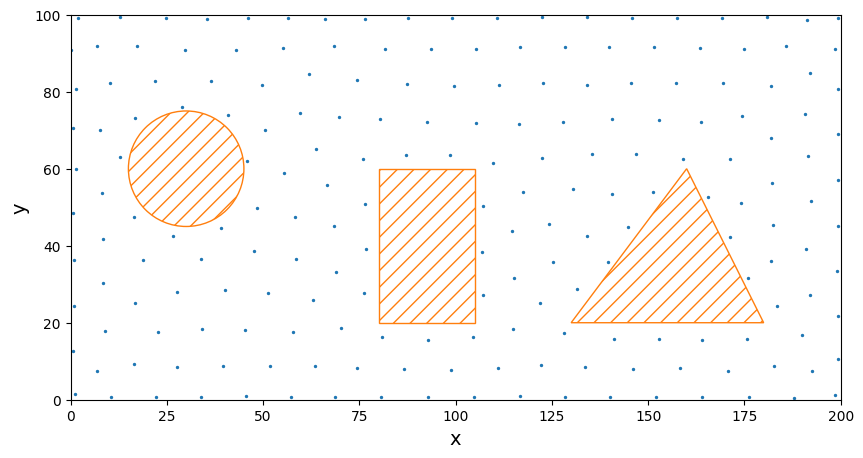

In [4]:
# Plot the sensor locations and the obstacles
plt.figure(figsize=(10, 5))
plt.scatter(sgp_sol_sp[:, 0], sgp_sol_sp[:, 1], 
            color='C0', 
            s=2, 
            label='Solution Placements')

ax = plt.gca()
ax.add_patch(plt.Polygon([[80, 20], [105, 20], [105, 60], [80, 60]], 
             fill=None, hatch='//', color='C1', label='Obstacle'))
ax.add_patch(plt.Polygon([[130, 20], [180, 20], [160, 60]], 
             fill=None, hatch='//', color='C1'))
ax.add_patch(plt.Circle((30, 60), 15, 
             fill=None, hatch='//', color='C1'))
ax.set_aspect('equal')

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(0, 200)
plt.ylim(0, 100)

plt.show()

### Note that all the solution placements avoid the obstacles